# Pymaceuticals Inc.
---

### Analysis
It appears that there is an inverse relationship between mouse weight and treatment efficacy, as depicted by the scatter plot along with its regression line.

Among the tested drugs, only Infubinol displayed an outlier, as evident in the box plot, indicating overall reliability in the other drugs.

The bar plot illustrates that Capomulin underwent testing on the highest number of mice and exhibited the most successful treatment outcome compared to other drugs. The correlation coefficient between mouse weight and average tumor volume is 0.84, indicating a strong positive correlation: as mouse weight increases, average tumor volume also increases.

Regarding the bar plot, it's noted that Capomulin and Ramicane were subjected to the highest number of observations, each exceeding 200 timepoints, while Propriva and Stelasyn had fewer than 200 observations each.

In the pie plot, it's observed that male mice slightly outnumbered female mice, comprising 51% of the total population, whereas females comprised 49%.

Analysis of quartiles and outliers reveals a wide range of tumor volume values across different drug regimens, with some drugs exhibiting larger interquartile ranges than others. Outliers, which fall outside the typical data range, are also highlighted in the box plots.

The line plot presents the tumor volume over time for a single mouse treated with Capomulin, offering a detailed view of tumor volume changes. It suggests a reduction in tumor volume over time, indicating the effectiveness of the Capomulin regimen in tumor suppression.

Finally, the correlation coefficient and linear regression model confirm a strong positive correlation between mouse weight and average tumor volume under the Capomulin regimen.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_studies = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_studies

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
# Option 1 of calculating the number of mice
# mice_count = merge_studies['Mouse ID'].value_counts()
# mice_count

# Option 2 of calculating the number of mice
mice_count = merged_studies['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# 1st let's find any duplicates for Mouse ID and Timepoint
duplicate_mice = merged_studies[merged_studies.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Printing the duplicate_mice dataframe
# 2nd Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = duplicate_mice['Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Get all the data for the duplicate mouse ID. 
duplicated_IDs = merged_studies.loc[merged_studies['Mouse ID'].isin(duplicate_mice_id)]
duplicated_IDs

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_studies_clean = merged_studies[merged_studies['Mouse ID'].isin(duplicate_mice_id)==False]
merged_studies_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
# Option 1 of calculating the number of mice
# count_of_mice = merged_studies_clean['Mouse ID'].value_counts()
# count_of_mice


# Option 2 of calculating the number of mice
cleaned_mice_count = merged_studies_clean['Mouse ID'].nunique()
cleaned_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# 1st grouping by the Drug Regimen
gb_drug_regimen = merged_studies_clean.groupby('Drug Regimen')
# Testing the function 
    #gb_drug_regimen

# Calculating the mean of the tumor volume
mean_tumor_volume = gb_drug_regimen['Tumor Volume (mm3)'].mean()
# Testing the function
    # mean_tumor_volume

# Calculating the median of the tumor volume
median_tumor_volume = gb_drug_regimen['Tumor Volume (mm3)'].median()
# Testing the function
    # median_tumor_volume

# Calculating the variance of the tumor volume
variance_tumor_volume = gb_drug_regimen['Tumor Volume (mm3)'].var()
# Testing the function
    #variance_tumor_volume

# Calculating the standard deviation of the tumor volume
stdv_tumor_volume = gb_drug_regimen['Tumor Volume (mm3)'].std()
# Testing the function
    # stdv_tumor_volume

# Calculating the SEM of the tumor volume
sem_tumor_volume = gb_drug_regimen['Tumor Volume (mm3)'].sem()
# Testing the function
    # sem_tumor_volume

#Assembling the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": stdv_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# Using the aggregation method, produce the same summary statistics in a single line
gb_drug_regimen = merged_studies_clean.groupby('Drug Regimen')
agg_method_summary = gb_drug_regimen.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_method_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

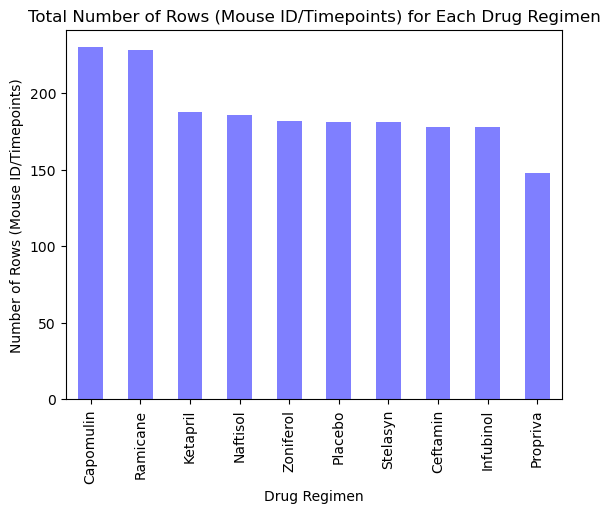

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Using the previoysly groupby variable gb_drug_regimen to calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
n_per_drug_regimen = gb_drug_regimen['Mouse ID'].count()
# Testing the function
    # n_per_drug_regimen

#Sorting the data
sorted_numbers = n_per_drug_regimen.sort_values(ascending=False)

#Bar Chart
sorted_numbers.plot(kind='bar', color= 'b', alpha=0.5, align="center", width=0.5)
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")  
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=90)
plt.show()

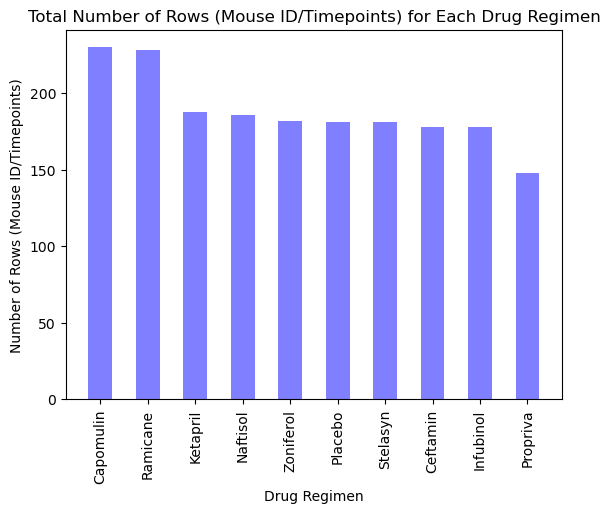

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Bar Chart
sorted_numbers = n_per_drug_regimen.sort_values(ascending=False)
plt.bar(sorted_numbers.index, sorted_numbers, color='b', alpha=0.5, align="center", width=0.5)
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=90)
plt.show()



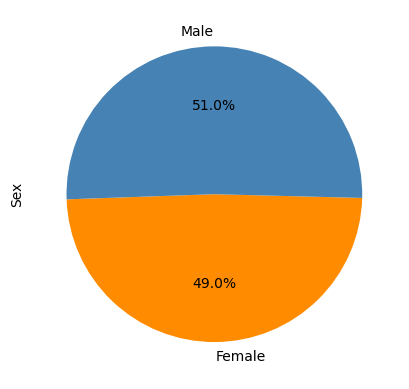

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = merged_studies_clean.groupby(['Sex']).count()[('Mouse ID')]
# Testing the function
    #print(gender_distribution)
#Pie Chart
gender_pie = gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=182, colors = ['darkorange', 'steelblue'])
plt.ylabel('Sex')
plt.title('')
plt.show()

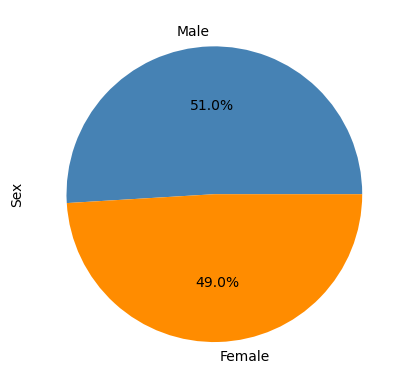

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie Chart
gender_distribution = merged_studies_clean
counts = gender_distribution['Sex'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=360, colors=['steelblue', 'darkorange'])
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = merged_studies_clean.loc[merged_studies_clean['Drug Regimen'] == 'Capomulin']
Ramicane_df = merged_studies_clean.loc[merged_studies_clean['Drug Regimen'] == 'Ramicane']
Infubinol_df = merged_studies_clean.loc[merged_studies_clean['Drug Regimen'] == 'Infubinol']
Ceftamin_df= merged_studies_clean.loc[merged_studies_clean['Drug Regimen'] == 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse and merge the four dataframes
gratest_timepoint = merged_studies_clean.groupby(['Mouse ID'])['Timepoint'].max()
timepoint_df = pd.DataFrame(gratest_timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_df = pd.merge(merged_studies_clean, timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers
for regimen in treatments:
    #  Locate the rows which contain mice on each drug and get the tumor volumes
    max_regimen_df = merged_studies_clean.loc[merged_studies_clean['Drug Regimen'] == regimen]
    # add subset
    max_timepoint = max_regimen_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
    tumor_vol_df = pd.merge(max_timepoint, max_regimen_df, on=['Mouse ID', 'Timepoint'], how='left')
    # add to the empty list
    tumor_vol_data.append(tumor_vol_df['Tumor Volume (mm3)'])

    #quarter, median and upper quartile
    quartiles = tumor_vol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print (f"Lower quartile of {regimen} is {lowerq}")
    print (f"Upper quartile of {regimen} is {upperq}")
    print (f"Interquartile range of {regimen} is {iqr}")
    print (f"Median of {regimen} is {quartiles[0.5]}")
    print (f"{'-'*30}")
    print (f"Values below {lower_bound} for {regimen} could be outliers.")
    print (f"Values above {upper_bound} for {regimen} could be outliers.")

    # Determine outliers using upper and lower bounds
    outliers = tumor_vol_df.loc[(tumor_vol_df['Tumor Volume (mm3)'] < lower_bound) | (tumor_vol_df['Tumor Volume (mm3)'] > upper_bound)]
    if len(outliers) == 0:
        print(f"\n{regimen} has no potential outliers\n")
        print("-------------------------------------")
    else:
        print(f"\nPotential outliers for {regimen} are:\n")
        print(outliers.to_string(index=False))
        print("-------------------------------------")


Lower quartile of Capomulin is 32.37735684
Upper quartile of Capomulin is 40.1592203
Interquartile range of Capomulin is 7.781863460000004
Median of Capomulin is 38.1251644
------------------------------
Values below 20.70456164999999 for Capomulin could be outliers.
Values above 51.83201549 for Capomulin could be outliers.

Capomulin has no potential outliers

-------------------------------------
Lower quartile of Ramicane is 31.56046955
Upper quartile of Ramicane is 40.65900627
Interquartile range of Ramicane is 9.098536719999998
Median of Ramicane is 36.56165229
------------------------------
Values below 17.912664470000003 for Ramicane could be outliers.
Values above 54.30681135 for Ramicane could be outliers.

Ramicane has no potential outliers

-------------------------------------
Lower quartile of Infubinol is 54.04860769
Upper quartile of Infubinol is 65.52574285
Interquartile range of Infubinol is 11.477135160000003
Median of Infubinol is 60.16518046
------------------------

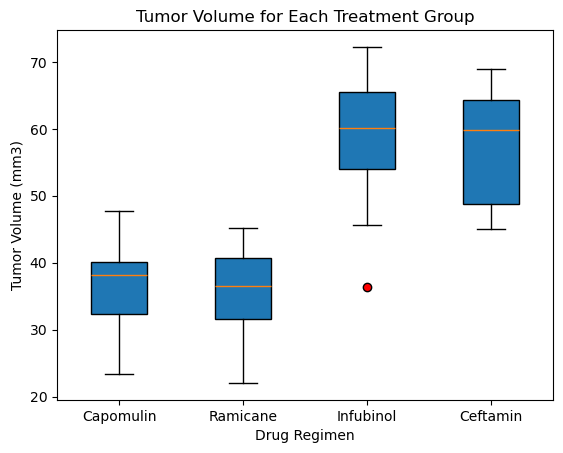

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# 1st way of generating the box plot
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Each Treatment Group')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data, labels = treatments, patch_artist=True, flierprops=dict(markerfacecolor='r', marker='o'))
plt.show()

#2nd way of generating the box plot
    # tumor_boxplot = plt.boxplot(tumor_vol_data, labels = treatments, patch_artist=True, flierprops=dict(markerfacecolor='r', marker='o'))
    # plt.title('Tumor Volume for Each Treatment Group')
    # plt.xlabel('Drug Regimen')
    # plt.ylabel('Tumor Volume (mm3)')
    # plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Selecting a single mouse treated with Capomulin
one_mouse = merged_studies_clean.loc[merged_studies_clean['Mouse ID'] == 'l509']
one_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


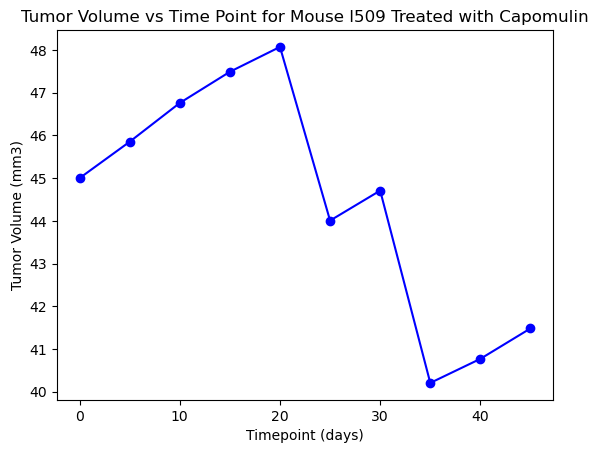

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = one_mouse['Timepoint']
y_axis = one_mouse['Tumor Volume (mm3)']

 # Generating the line plot
plt.plot(x_axis, y_axis, marker = 'o', color = 'b')
plt.title('Tumor Volume vs Time Point for Mouse l509 Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')    
plt.show()


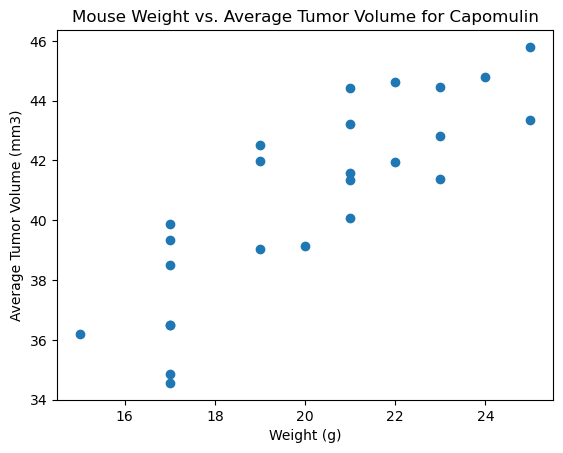

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Filter By Regimen
cap_regime = merged_studies_clean.loc[merged_studies_clean['Drug Regimen'] == 'Capomulin'].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(cap_regime['Weight (g)'],cap_regime['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


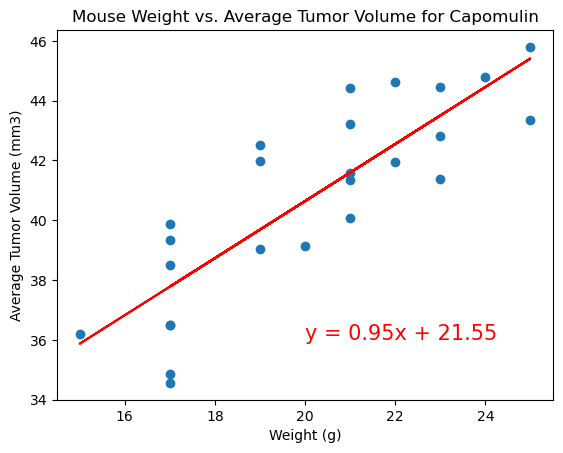

The r-squared is: 0.7088568047708723


In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(cap_regime['Weight (g)'],cap_regime['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_regime['Weight (g)'],cap_regime['Tumor Volume (mm3)'])
regress_values = cap_regime['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter Plot
plt.scatter(cap_regime['Weight (g)'],cap_regime['Tumor Volume (mm3)'])
plt.plot(cap_regime['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The r-squared is: {rvalue**2}")